In [1]:
from autots import AutoTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
data = pd.read_csv("data/Foreign_Exchange_Rates.xls")
data.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,Unnamed: 24
0,0,03-01-2000,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97,NaN
1,1,04-01-2000,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13,NaN
2,2,05-01-2000,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1,NaN
3,3,06-01-2000,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62,NaN
4,4,07-01-2000,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3,NaN


In [3]:
# dropping null values and converting timeseries to datetime 
data.dropna()
data['Time Serie'] = pd.to_datetime(data['Time Serie'], format='%d-%m-%Y')

In [4]:
# Pre-Processing 
# date conversion already done, null values already dropped 
data.isnull().sum()
print("\n Duplicates:",data.duplicated().sum())
 
data = data.drop("Unnamed: 0", axis = 1) # remove index column 
data = data.drop("Unnamed: 24", axis = 1) # remove final column with 0 distinct values
data = data.replace("ND", np.nan) # replace NDs with NaN values
data = data.dropna() 

reformat = data.drop("Time Serie", axis = 1)
time_series = data[["Time Serie"]].iloc[1:]
reformat_ = reformat.iloc[1:].astype(float) # reformat currencies as floats

reformat_.insert(0, "Time Serie", time_series.values) 
data_cleaned = reformat_.copy()

print(data_cleaned.head())
print(data_cleaned.info())

# no encoding required



 Duplicates: 0
  Time Serie  AUSTRALIA - AUSTRALIAN DOLLAR/US$  EURO AREA - EURO/US$  \
1 2000-01-04                             1.5239                0.9700   
2 2000-01-05                             1.5267                0.9676   
3 2000-01-06                             1.5291                0.9686   
4 2000-01-07                             1.5272                0.9714   
5 2000-01-10                             1.5242                0.9754   

   NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
1                               1.9238   
2                               1.9339   
3                               1.9436   
4                               1.9380   
5                               1.9350   

   UNITED KINGDOM - UNITED KINGDOM POUND/US$  BRAZIL - REAL/US$  \
1                                     0.6109             1.8405   
2                                     0.6092             1.8560   
3                                     0.6070             1.8400   
4                       

In [5]:
# EDA 
# univariate analysis
print(data_cleaned.describe()) # counts are all consistent; ranges, mean, max and min are reasonable

                          Time Serie  AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
count                           5014                        5014.000000   
mean   2009-12-26 09:57:39.274032896                           1.332123   
min              2000-01-04 00:00:00                           0.906900   
25%              2004-12-29 06:00:00                           1.115200   
50%              2009-12-22 12:00:00                           1.311200   
75%              2014-12-22 18:00:00                           1.430200   
max              2019-12-31 00:00:00                           2.071300   
std                              NaN                           0.269988   

       EURO AREA - EURO/US$  NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
count           5014.000000                          5014.000000   
mean               0.843986                             1.543749   
min                0.624600                             1.134600   
25%                0.751000                         

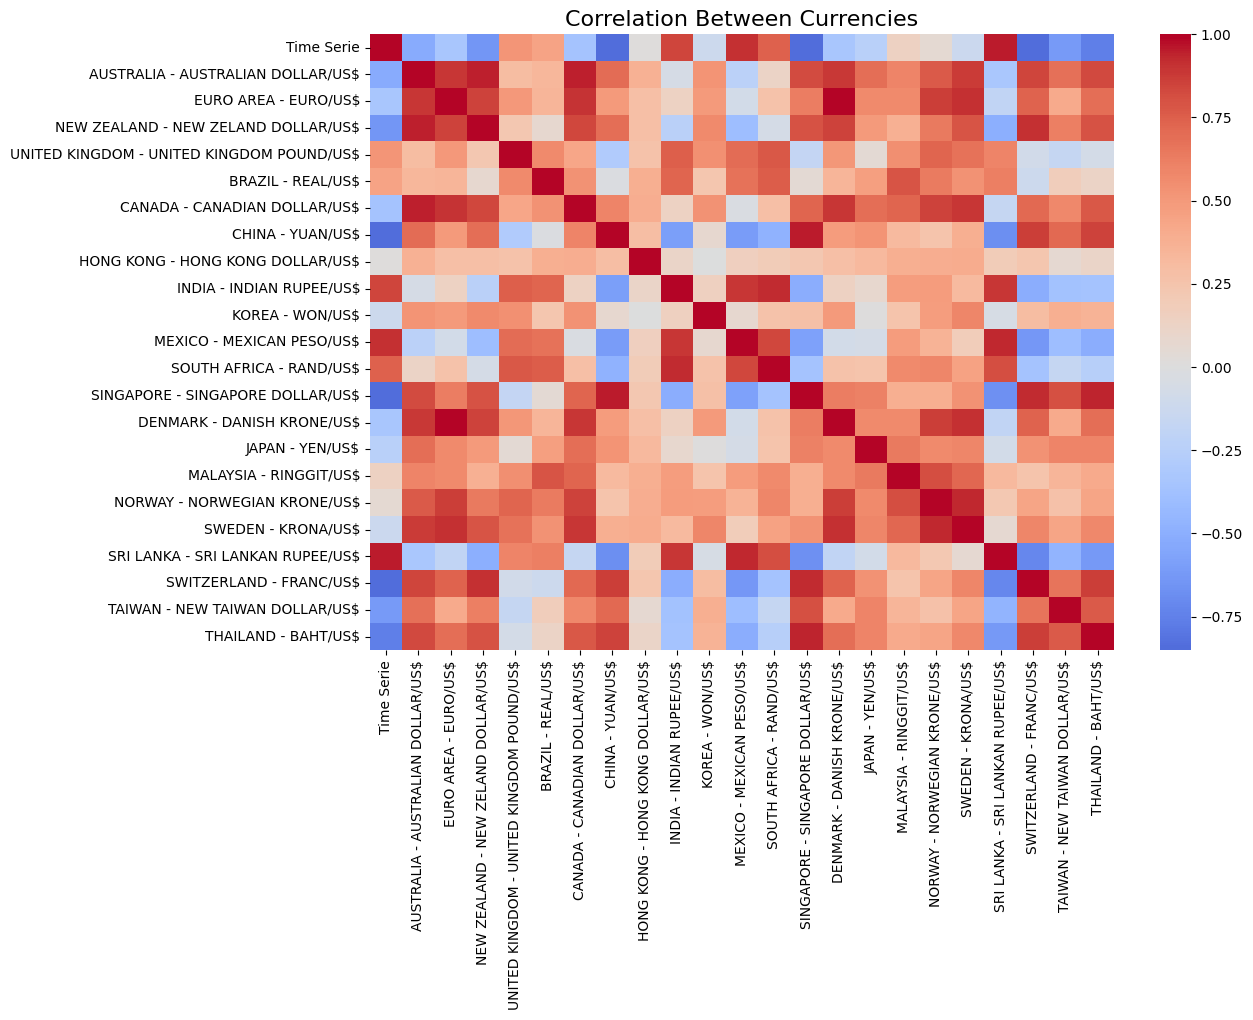

In [6]:
# Multivariate analysis - correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Between Currencies", fontsize=16)

plt.show()

The strongest bivariate correlations can be observed between: Euros and Danish Krona, Australian Dollars and Canadian Dollars, Singapore Dollars and Chinese Yuan.

The strongest multivariate correlations can be observed between: Euros, US Dollars and New Zealand Dollars.

Hong Kong Dollars don't appear to strongly correlate with any other currency and Korean Won, though not to the same degree as Hong Kong Dollars.

Mexican Pesos, Indian Rupees and Sri Lankan Rupees appear to be significantly correlated with each other whilst all being negatively correlated with the majority of other currencies.

Many more conclusions can be made from this heatmap...

#### Notes for selecting and scaling models

Classical ML models scale all numeric features except datetime. Whilst Deep Learning models (e.g. LSTMs, GRUs, Transformers for time series) scale all numeric inputs and keep the time order intact.

Choose scaler depending on model: MinMax for RNNs/NNs StandardScaler for regression/linear models.

Compare different models (Traditional ML, DeepLearning or Transformers) and select the bestmodels

I choose : Prophet, ARIMA and LSTM

In [34]:
#selecting currency

options = {
    'AUSTRALIAN DOLLAR': 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
    'EURO': 'EURO AREA - EURO/US$',
    'NEW ZEALAND DOLLAR': 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
    'GREAT BRITAIN POUNDS': 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
    'BRAZILIAN REAL': 'BRAZIL - REAL/US$',
    'CANADIAN DOLLAR': 'CANADA - CANADIAN DOLLAR/US$',
    'CHINESE YUAN$': 'CHINA - YUAN/US$',
    'HONG KONG DOLLAR': 'HONG KONG - HONG KONG DOLLAR/US$',
    'INDIAN RUPEE': 'INDIA - INDIAN RUPEE/US$',
    'KOREAN WON$': 'KOREA - WON/US$',
    'MEXICAN PESO': 'MEXICO - MEXICAN PESO/US$',
    'SOUTH AFRICAN RAND$': 'SOUTH AFRICA - RAND/US$',
    'SINGAPORE DOLLAR': 'SINGAPORE - SINGAPORE DOLLAR/US$',
    'DANISH KRONE': 'DENMARK - DANISH KRONE/US$',
    'JAPANESE YEN$': 'JAPAN - YEN/US$',
    'MALAYSIAN RINGGIT': 'MALAYSIA - RINGGIT/US$',
    'NORWEGIAN KRONE': 'NORWAY - NORWEGIAN KRONE/US$',
    'SWEDEN KRONA': 'SWEDEN - KRONA/US$',
    'SRILANKAN RUPEE': 'SRI LANKA - SRI LANKAN RUPEE/US$',
    'SWISS FRANC': 'SWITZERLAND - FRANC/US$',
    'NEW TAIWAN DOLLAR': 'TAIWAN - NEW TAIWAN DOLLAR/US$',
    'THAI BAHT': 'THAILAND - BAHT/US$'
}

selected_option = 'SRILANKAN RUPEE' #select currency here to train model

In [8]:
# Demo Test Model - AutoTS  
#future_AT = 10 #no of days for forecasting

#model = AutoTS(forecast_length=int(future_AT), frequency='infer', ensemble='simple', drop_data_older_than_periods=200, max_generations=3, models_to_validate=15, verbose =0)
#model = model.fit(data, date_col = 'Time Serie', value_col=options[selected_option], id_col=None)

In [9]:
#generating forecasts
#prediction = model.predict()
#forecast_AT = prediction.forecast

In [10]:
#forecast_AT

In [11]:
# First Test Model - Prophet (traditional ML & statistical model)
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import logging
logging.getLogger("statsmodels").setLevel(logging.ERROR)

def train_prophet_model(data, selected_currency):
    """Train Prophet for individual currency"""
    print(f"\n{'='*20} PROPHET MODEL - {selected_currency} {'='*20}")
    
    prophet_data = pd.concat([data["Time Serie"], data[selected_currency]], axis = 1).reset_index(drop = True)
    prophet_data.columns = ["ds", "y"]  # Prophet expects these names
    prophet_data["ds"] = pd.to_datetime(prophet_data["ds"])
    prophet_data["y"] = pd.to_numeric(prophet_data["y"])
    
    # Train/test split
    split = int(0.8 * len(prophet_data))
    train_data = prophet_data[:split]
    test_data = prophet_data[split:]
    
    # Create and fit Prophet model
    model = Prophet(
        daily_seasonality=False,
        weekly_seasonality=True,
        yearly_seasonality=False,
        changepoint_prior_scale=0.01,  # Flexibility of trend changes
        seasonality_prior_scale=1.0, # Flexibility of seasonality
        interval_width = 0.95
    )
    
    print("Training Prophet...")
    model.fit(train_data)
    
    future = model.make_future_dataframe(periods=len(test_data))
    predictions = model.predict(future)
    test_predictions = predictions['trend'][-len(test_data):].values
    actual = test_data['y'].values
    
    extended_future = model.make_future_dataframe(periods= 8, freq='YE')
    future_forecast = model.predict(extended_future)
    forecast = future_forecast['trend'][len(test_predictions):]
    
    
    # Calculate metrics
    mae = mean_absolute_error(actual, test_predictions)
    rmse = np.sqrt(mean_squared_error(actual, test_predictions))
    mape = mean_absolute_percentage_error(actual, test_predictions)
    
    return {
        'model': model,
        'forecast': forecast,
        'predictions': test_predictions,
        'test_data[y]': actual,
        'mae': mae,
        'rmse': rmse,
        'mape': mape,
        'test_data[ds]': test_data["ds"]
    }

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [ ]:
# Second Test Model - ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

def get_arima_vals(data, maxp =5, maxd =2, maxq =3):
    """Get p,d and q values for ARIMA model"""
    best_aic = float('inf')
    best_order = (0, 0, 0)
    
    for p in range(maxp + 1):
        for d in range(maxd + 1):
            for q in range(maxq + 1):
                try:
                    model = ARIMA(data, order=(p, d, q))
                    fitted = model.fit()
                    if fitted.aic < best_aic:
                        best_aic = fitted.aic
                        best_order = (p, d, q)
                except:
                    continue
    
    return best_order
    
# train model
def train_arima_model(data, selected_currency):
    """Train ARIMA for individual currency"""
    print(f"\n{'='*20} ARIMA MODEL - {selected_currency} {'='*20}")
    
    # Check stationarity
    def check_stationarity(data):
        """Check if data is already stationary"""
        result = adfuller(data.dropna())
        return result[1] < 0.05
    
    is_stationary = check_stationarity(data[selected_currency])
    print(f"Original data stationary: {is_stationary}")
    
    # Train/test split
    split = int(0.8 * len(data))
    data = data.set_index("Time Serie")
    train_data = data[selected_currency][:split]
    test_data = data[selected_currency][split:]
    
    # Find best ARIMA order
    print("Finding best ARIMA order...")
    best_order = get_arima_vals(train_data)
    print(f"Best ARIMA order: {best_order}")
    
    # Fit ARIMA model
    print("\nTraining ARIMA...")
    model = ARIMA(train_data, order=best_order)
    import logging
    logging.getLogger("statsmodels").setLevel(logging.ERROR)
    fitted_model = model.fit(method_kwargs={"disp": 0})
    
    # Make predictions
    forecast = fitted_model.get_forecast(steps = 8)
    forecast_result = forecast.predicted_mean
    
    test_forecast = fitted_model.get_forecast(steps=len(test_data))
    predictions = test_forecast.predicted_mean
    actual = test_data.values 
    
    # Calculate metrics
    mae = mean_absolute_error(actual, predictions)
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    mape = mean_absolute_percentage_error(actual, predictions)
    
    return {
        'model': fitted_model,
        'predictions': predictions,
        'test_data[y]': test_data,
        'forecast': forecast_result,
        'mae': mae,
        'rmse': rmse,
        'mape': mape,
        'order': best_order
    }


In [13]:
# Third Test Model - LSTM
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

def train_lstm_model(data, selected_currency):
    """Train LSTM for a selected currency"""
    print(f"\n{'='*20} LSTM MODEL - {selected_currency} {'='*20}")
    data = data[selected_currency].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    
    lookback = 30
    
    def create_lstm_sequences(data, lookback):
        """Create sequences for LSTM training"""
        X, y = [], []
        for i in range(lookback, len(data)):
            X.append(data[i-lookback:i, 0])
            y.append(data[i, 0])  # Next day
        return np.array(X), np.array(y)
    
    X, y = create_lstm_sequences(scaled_data, lookback)
    
    # Train/test split
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    
    # Reshape for LSTM [samples, timesteps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # Build model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(lookback, 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(1) 
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics = ['mae'])
    
    print("Training LSTM...")
    history = model.fit(
        X_train, y_train,
        batch_size=32,
        epochs=25, 
        validation_data=(X_test, y_test),
        verbose=0
    )
    
    # Make predictions
    future_dates = pd.date_range(start="2019-12-31", end="2026-12-31", freq="YE")
    steps = len(future_dates)
    
    def forecast_lstm(model, last_sequence, steps, scaler):
        forecast = []
        current_sequence = last_sequence.copy()

        for _ in range(steps):
            # Predict next value
            pred_scaled = model.predict(current_sequence.reshape(1, -1, 1), verbose=0)
            
            # Store inverse transformed prediction
            pred = scaler.inverse_transform(pred_scaled)[0, 0]
            forecast.append(pred)
            
            # Update the sequence: drop first value, append prediction
            current_sequence = np.append(current_sequence[1:], pred_scaled)

        return forecast
    
    last_sequence = X_test[-1].flatten()
    lstm_preds = forecast_lstm(model, last_sequence, steps, scaler)
    
    predictions_scaled = model.predict(X_test, verbose = 0)
    predictions = scaler.inverse_transform(predictions_scaled)
    actual = scaler.inverse_transform(y_test.reshape(-1,1))
    
    # Calculate metrics
    mae = mean_absolute_error(actual, predictions)
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    mape = mean_absolute_percentage_error(actual, predictions)
    
    return {
        'model': model,
        'scaler': scaler,
        'predictions': predictions,
        'test_data[y]': actual,
        'future dates': future_dates,
        'forecast': lstm_preds,
        'mae': mae,
        'rmse': rmse,
        'mape': mape,
        'history': history
    }


In [25]:
def compare_models(lstm_result, arima_result, prophet_result):
    print(f"\n{'='*50}")
    print("MODEL COMPARISON SUMMARY")
    print(f"{'='*50}")
    
    models = {
        'LSTM': lstm_result,
        'ARIMA': arima_result,
        'Prophet': prophet_result
    }
    
    future_dates = pd.date_range(start="2019-12-31", end="2026-12-31", freq="YE")
    lstm_forecast = np.ravel(lstm_result['forecast'])[:len(future_dates)]
    arima_forecast = np.ravel(arima_result['forecast'])[:len(future_dates)]
    prophet_forecast = np.ravel(prophet_result['forecast'])[:len(future_dates)]
    
    comparison_df = pd.DataFrame({
    "Date": future_dates, 
    "LSTM": lstm_forecast,
    "ARIMA": arima_forecast,
    "Prophet": prophet_forecast,
    })

    print("\n=== Forecast Comparison ===")
    print(comparison_df.head())
    
    metrics_df = pd.DataFrame({
        "Model": ["LSTM", "ARIMA", "Prophet"],
        "MAE": [lstm_result['mae'], arima_result['mae'], prophet_result['mae']],
        "RMSE": [lstm_result['rmse'], arima_result['rmse'], prophet_result['rmse']],
        "MAPE": [lstm_result['mape'], arima_result['mape'], prophet_result['mape']]
    })
    
    print("\n=== Test Metrics Summary ===")
    print(metrics_df)
    
    # Find best model
    best_model_name = min(models.keys(), key=lambda x: models[x]['mae'])
    best_model = models[best_model_name]['model']
    print(f"\n\nBest Model (lowest MAE): {best_model}")
    
    return {
        "results": models,
        "best_model_name": best_model_name,
        "best_model": best_model
    }

In [15]:
# Testing and evaluating all models 
print("Training models on {options[selected_option]} data...")

import logging
logging.getLogger("statsmodels").setLevel(logging.ERROR)

prophet_result = train_prophet_model(data_cleaned, options[selected_option])    
lstm_result = train_lstm_model(data_cleaned, options[selected_option])
arima_result = train_arima_model(data_cleaned, options[selected_option])

comparison = compare_models(lstm_result, arima_result, prophet_result)


Training models on {options[selected_option]} data...

==================== PROPHET MODEL - SRI LANKA - SRI LANKAN RUPEE/US$ ====================
Training Prophet...


20:33:40 - cmdstanpy - INFO - Chain [1] start processing
20:33:42 - cmdstanpy - INFO - Chain [1] done processing



==================== LSTM MODEL - SRI LANKA - SRI LANKAN RUPEE/US$ ====================


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM...

==================== ARIMA MODEL - SRI LANKA - SRI LANKAN RUPEE/US$ ====================
Original data stationary: False
Finding best ARIMA order...


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

Best ARIMA order: (4, 1, 3)

Training ARIMA...

MODEL COMPARISON SUMMARY

=== Forecast Comparison ===
        Date        LSTM       ARIMA    Prophet
0 2019-12-31  174.829697  143.604611  98.721244
1 2020-12-31  174.494766  143.626690  98.744421
2 2021-12-31  173.912567  143.623430  98.752147
3 2022-12-31  173.158768  143.620122  98.759873
4 2023-12-31  172.288422  143.639872  98.767598

=== Test Metrics Summary ===
     Model        MAE       RMSE      MAPE
0     LSTM   6.634084   6.695518  0.041681
1    ARIMA  15.956605  20.659299  0.094081
2  Prophet  19.879601  22.836964  0.119779


Best Model (lowest MAE): LSTM


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_

In [35]:
import joblib
import re
from IPython.display import clear_output
from tensorflow.keras.models import save_model, load_model

def safe_filename(currency):
    # Replace spaces and special characters with underscores
        return re.sub(r'[^\w\-]', '_', currency)
    
for selected_option in options:
    currency = options[selected_option]

    prophet_result = train_prophet_model(data_cleaned, currency)    
    lstm_result = train_lstm_model(data_cleaned, currency)
    arima_result = train_arima_model(data_cleaned, currency)

    comparison = compare_models(lstm_result, arima_result, prophet_result)
    
    best_model = comparison['best_model']
    best_model_name = comparison['best_model_name']
    
    filename = safe_filename(selected_option)
    
    if best_model_name == "LSTM":
        best_model.save(f'models/{filename}.h5')
        clear_output(wait = True)
    else:
        joblib.dump(best_model, f'models/{filename}.pkl')
        clear_output(wait = True)
    


==================== PROPHET MODEL - THAILAND - BAHT/US$ ====================


DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\Admin\AppData\Local\Temp\tmpdq2my5mt\wa_7jmky.json


Training Prophet...


DEBUG:cmdstanpy:input tempfile: C:\Users\Admin\AppData\Local\Temp\tmpdq2my5mt\93m5r_1s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\Admin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=15740', 'data', 'file=C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpdq2my5mt\\wa_7jmky.json', 'init=C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpdq2my5mt\\93m5r_1s.json', 'output', 'file=C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpdq2my5mt\\prophet_modelfehj4jyf\\prophet_model-20250923205832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:58:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:58:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



==================== LSTM MODEL - THAILAND - BAHT/US$ ====================


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM...

==================== ARIMA MODEL - THAILAND - BAHT/US$ ====================
Original data stationary: False
Finding best ARIMA order...


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

Best ARIMA order: (3, 1, 3)

Training ARIMA...


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:


MODEL COMPARISON SUMMARY

=== Forecast Comparison ===
        Date       LSTM      ARIMA    Prophet
0 2019-12-31  30.328892  36.069705  40.389847
1 2020-12-31  30.334063  36.072461  40.373911
2 2021-12-31  30.360102  36.078072  40.368598
3 2022-12-31  30.398220  36.085444  40.363286
4 2023-12-31  30.443037  36.087296  40.357974

=== Test Metrics Summary ===
     Model       MAE      RMSE      MAPE
0     LSTM  0.167427  0.204262  0.005096
1    ARIMA  4.305966  4.859009  0.133827
2  Prophet  3.544296  4.384549  0.111257


Best Model (lowest MAE): <Sequential name=sequential_35, built=True>
